<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\z'
<>:83: SyntaxWarning: invalid escape sequence '\z'
<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:77: SyntaxWarning: invalid escape sequence '\p'
<>:83: SyntaxWarning: invalid escape sequence '\z'
<>:83: SyntaxWarning: invalid escape sequence '\z'
C:\Users\marce\AppData\Local\Temp\ipykernel_9400\3112831059.py:77: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Funkcja strumienia $\psi(y)$'); plt.xlabel('y'); plt.ylabel('$\psi$'); plt.grid(True); plt.legend()
C:\Users\marce\AppData\Local\Temp\ipykernel_9400\3112831059.py:77: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Funkcja strumienia $\psi(y)$'); plt.xlabel('y'); plt.ylabel('$\psi$'); plt.grid(True); plt.legend()
C:\Users\marce\AppData\Local\Temp\ipykernel_9400\3112831059.py:83: SyntaxWarning: invalid escape sequence '\z'
  plt.title('Wirowość $\zeta(y)$'

Ustawianie warunków brzegowych...
Iteracja: 500, Zmiana: 1.19e-05
Iteracja: 1000, Zmiana: 6.57e-06
Iteracja: 1500, Zmiana: 3.53e-06
Iteracja: 2000, Zmiana: 1.86e-06
Iteracja: 2500, Zmiana: 9.63e-07
Iteracja: 3000, Zmiana: 4.92e-07
Iteracja: 3500, Zmiana: 2.49e-07
Iteracja: 4000, Zmiana: 1.24e-07

Osiągnięto zbieżność w iteracji 4156.


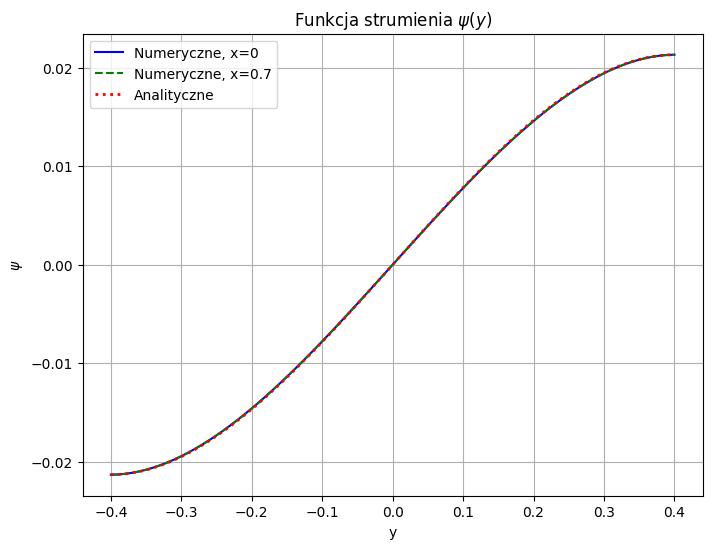

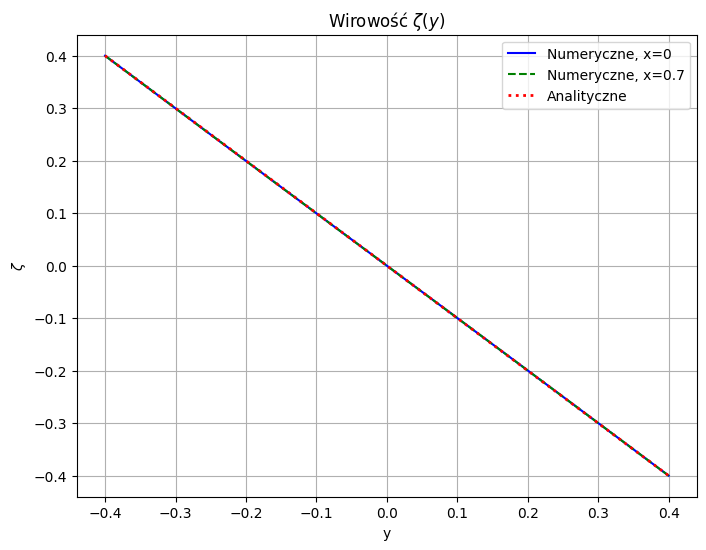

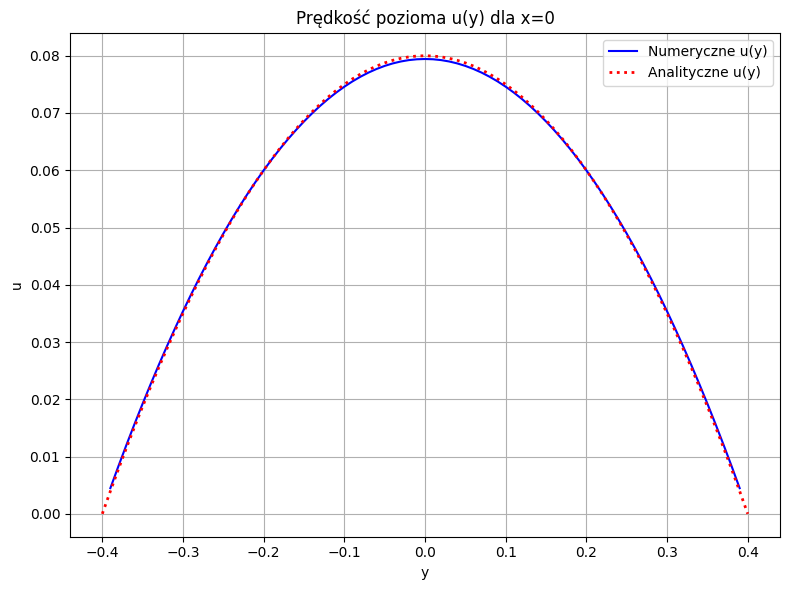

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
NX, NY = 251, 81
I_OFFSET, J_OFFSET = 100, 40
DZ = 0.01
Q, MU, RHO = -1.0, 1.0, 1.0
Y1, Y2 = -40 * DZ, 40 * DZ
MAX_ITER, CONV_TOLERANCE, CHECK_ITER_START = 50000, 1e-7, 100

# Inicjalizacja siatek
psi = np.zeros((NX, NY))
zeta = np.zeros((NX, NY))

# Funkcje analityczne
def psi_analytic(y):
    return (Q / (2 * MU)) * (y**3 / 3 + Y1 * Y2 * y)

def zeta_analytic(y):
    return (Q / MU) * y

# Ustawienie warunków brzegowych
print("Ustawianie warunków brzegowych...")
y_vec = (np.arange(NY) - J_OFFSET) * DZ
psi_ana_boundary = psi_analytic(y_vec)
zeta_ana_boundary = zeta_analytic(y_vec)
psi[0, :], psi[-1, :] = psi_ana_boundary, psi_ana_boundary
zeta[0, :], zeta[-1, :] = zeta_ana_boundary, zeta_ana_boundary
psi[:, 0], psi[:, -1] = psi_ana_boundary[0], psi_ana_boundary[-1]
zeta[:, 0], zeta[:, -1] = zeta_ana_boundary[0], zeta_ana_boundary[-1]

# Główna pętla iteracyjna
CONVERGENCE_CHECK_I = 50 + I_OFFSET
CONVERGENCE_CHECK_J = 20 + J_OFFSET 

for it in range(MAX_ITER):
    psi_old_check = psi[CONVERGENCE_CHECK_I, CONVERGENCE_CHECK_J]

    psin = psi.copy()
    zetan = zeta.copy()

    # Krok 1: Aktualizacja PSI 
    psin[1:-1, 1:-1] = 0.25 * (psi[2:, 1:-1] + psi[:-2, 1:-1] + psi[1:-1, 2:] + psi[1:-1, :-2] - zeta[1:-1, 1:-1] * DZ**2)

    # Krok 2: Aktualizacja ZETA 
    zetan[1:-1, 1:-1] = 0.25 * (zeta[2:, 1:-1] + zeta[:-2, 1:-1] + zeta[1:-1, 2:] + zeta[1:-1, :-2])

    psi = psin
    zeta = zetan
    
    # Sprawdzanie zbieżności
    if it > CHECK_ITER_START:
        delta = abs(psi[CONVERGENCE_CHECK_I, CONVERGENCE_CHECK_J] - psi_old_check)
        if it % 500 == 0:
            print(f"Iteracja: {it}, Zmiana: {delta:.2e}")
        if delta < CONV_TOLERANCE:
            print(f"\nOsiągnięto zbieżność w iteracji {it}.")
            break
else:
    print(f"\nOsiągnięto maksymalną liczbę iteracji.")

# Rysowanie wykresów
y_vals = (np.arange(NY) - J_OFFSET) * DZ 
i_x0, i_x07 = 0 + I_OFFSET, 70 + I_OFFSET
psi_x0_num, zeta_x0_num = psi[i_x0, :], zeta[i_x0, :]
psi_x07_num, zeta_x07_num = psi[i_x07, :], zeta[i_x07, :]
psi_ana, zeta_ana = psi_analytic(y_vals), zeta_analytic(y_vals)

plt.figure(figsize=(8, 6))
plt.plot(y_vals, psi_x0_num, 'b-', label='Numeryczne, x=0')
plt.plot(y_vals, psi_x07_num, 'g--', label='Numeryczne, x=0.7')
plt.plot(y_vals, psi_ana, 'r:', lw=2, label='Analityczne')
plt.title('Funkcja strumienia $\psi(y)$'); plt.xlabel('y'); plt.ylabel('$\psi$'); plt.grid(True); plt.legend()

plt.figure(figsize=(8, 6))
plt.plot(y_vals, zeta_x0_num, 'b-', label='Numeryczne, x=0')
plt.plot(y_vals, zeta_x07_num, 'g--', label='Numeryczne, x=0.7')
plt.plot(y_vals, zeta_ana, 'r:', lw=2, label='Analityczne')
plt.title('Wirowość $\zeta(y)$'); plt.xlabel('y'); plt.ylabel('$\zeta$'); plt.grid(True); plt.legend()

u_x0 = (psi[i_x0, 2:] - psi[i_x0, :-2]) / (2 * DZ)
u_ana = (Q / (2 * MU)) * (y_vals**2 - Y2**2)
plt.figure(figsize=(8, 6))
plt.plot(y_vals[1:-1], u_x0, 'b-', label='Numeryczne u(y)')
plt.plot(y_vals, u_ana, 'r:', lw=2, label='Analityczne u(y)')
plt.title('Prędkość pozioma u(y) dla x=0'); plt.xlabel('y'); plt.ylabel('u'); plt.grid(True); plt.legend()
plt.tight_layout(); plt.show()